# Flipkart Fashion Products Dataset Analysis


1. **Overview of Problem Statement:**
      In the aspect of sales and marketing its an important task to predict the brand and most selling product during the discount days like flipkart big billion days or any other days which gives almost 50-100% discounts on there products.Here using this dataset we try to analyse the brands that gives top most discounts and the categories and products they give the discounts inorder to predict the most selling product during these days.

2. **Objective:**
     To develop a model that predicts the most selling product on discount days

3. **Data Description:**
    Dataset from Kaggle:https://www.kaggle.com/datasets/aaditshukla/flipkart-fasion-products-dataset .It consist of 30000 datas with 18 features.

4. **Data Collection:**
    In this analysis we are using a json data set which we convert into csv for further data cleaning and preprocessing.

5. **Data Preprocessing - Data Cleaning:**

In [178]:
import pandas as pd
from pandas import json_normalize
import json

In [179]:
data = pd.read_json('flipkart_fashion_products_dataset.json')
data
data.to_csv('flipkart_products.csv')
df = pd.read_csv('flipkart_products.csv')
df

,Unnamed: 0,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3705c6bd-6f23-529a-9b64-15b8fc568efa,"2,299",NaN,Oka,Clothing and Accessories,2021-02-11 01:31:54,NaN,40% off,['https://rukminim1.flixcart.com/image/128/128...,True,JCKFYPM35WMMTAEN,"[{'Color': 'Blue'}, {'Fabric': 'Nylon'}, {'Pat...",NaN,"1,379",Winter Wear,Sleeveless Solid Men Jacket,https://www.flipkart.com/okane-sleeveless-soli...
29996,29996,f2a683e4-634d-5a11-8950-2d56b924576d,799,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:54,NaN,34% off,['https://rukminim1.flixcart.com/image/128/128...,False,SRTFV8S7DCEWAQVH,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Printe...",OKANE,520,Bottomwear,Printed Men Blue Regular Shorts,https://www.flipkart.com/okane-printed-men-blu...
29997,29997,1efa858c-1360-59a6-9624-bb04eddb492c,"4,999",NaN,Oka,Clothing and Accessories,2021-02-11 01:31:54,NaN,40% off,['https://rukminim1.flixcart.com/image/128/128...,True,BZRFNAH7NWUB6F5E,"[{'Color': 'Grey'}, {'Fabric': 'Tweed'}, {'Pat...",NaN,"2,999","Blazers, Waistcoats and Suits",Checkered Single Breasted Casual Men Full Slee...,https://www.flipkart.com/okane-checkered-singl...
29998,29998,9fdfdd22-487b-599b-8be6-5dd00eb987c5,"3,125",3.8,Oka,Clothing and Accessories,2021-02-11 01:31:55,NaN,40% off,['https://rukminim1.flixcart.com/image/128/128...,False,JCKFWZZM6V7RS5EA,"[{'Color': 'Blue'}, {'Fabric': 'Nylon'}, {'Pat...",OKANE,"1,875",Winter Wear,Full Sleeve Solid Men Casual Jacket,https://www.flipkart.com/okane-full-sleeve-sol...


## Data Cleaning

* Converted the data to dataframe.
* data informations are collected ,It contains 17 columns.
* have to exculude null values from the data set by dropping those rows.
* _id,images,url,title can be eliminated as it does not give much informations on analysing the data.
* convert the actual_price and selling_price to float
* null values have to be replaced accordingly,eg:discount can be replaced as 0 % if it is null

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30000 non-null  int64  
 1   _id              30000 non-null  object 
 2   actual_price     29137 non-null  object 
 3   average_rating   27554 non-null  float64
 4   brand            27932 non-null  object 
 5   category         30000 non-null  object 
 6   crawled_at       30000 non-null  object 
 7   description      18017 non-null  object 
 8   discount         29059 non-null  object 
 9   images           30000 non-null  object 
 10  out_of_stock     30000 non-null  bool   
 11  pid              30000 non-null  object 
 12  product_details  30000 non-null  object 
 13  seller           28259 non-null  object 
 14  selling_price    29998 non-null  object 
 15  sub_category     30000 non-null  object 
 16  title            30000 non-null  object 
 17  url         

In [181]:
df.head()

,Unnamed: 0,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [182]:
# checking null values
df_missing = df.isnull().sum()
df_missing

Unnamed: 0             0
_id                    0
actual_price         863
average_rating      2446
brand               2068
category               0
crawled_at             0
description        11983
discount             941
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1741
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64

In [183]:
# dropping null valued rows
df = df.dropna()

#rechecking df
df_missing = df.isnull().sum()
df_missing

Unnamed: 0         0
_id                0
actual_price       0
average_rating     0
brand              0
category           0
crawled_at         0
description        0
discount           0
images             0
out_of_stock       0
pid                0
product_details    0
seller             0
selling_price      0
sub_category       0
title              0
url                0
dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14546 entries, 0 to 29992
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14546 non-null  int64  
 1   _id              14546 non-null  object 
 2   actual_price     14546 non-null  object 
 3   average_rating   14546 non-null  float64
 4   brand            14546 non-null  object 
 5   category         14546 non-null  object 
 6   crawled_at       14546 non-null  object 
 7   description      14546 non-null  object 
 8   discount         14546 non-null  object 
 9   images           14546 non-null  object 
 10  out_of_stock     14546 non-null  bool   
 11  pid              14546 non-null  object 
 12  product_details  14546 non-null  object 
 13  seller           14546 non-null  object 
 14  selling_price    14546 non-null  object 
 15  sub_category     14546 non-null  object 
 16  title            14546 non-null  object 
 17  url              

In [185]:
# removing unwanted columns
# _id,title,url,images
df_dropcolumn = df.drop(['_id','Unnamed: 0','images','url','title'],axis = 1)
df_dropcolumn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14546 entries, 0 to 29992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   actual_price     14546 non-null  object 
 1   average_rating   14546 non-null  float64
 2   brand            14546 non-null  object 
 3   category         14546 non-null  object 
 4   crawled_at       14546 non-null  object 
 5   description      14546 non-null  object 
 6   discount         14546 non-null  object 
 7   out_of_stock     14546 non-null  bool   
 8   pid              14546 non-null  object 
 9   product_details  14546 non-null  object 
 10  seller           14546 non-null  object 
 11  selling_price    14546 non-null  object 
 12  sub_category     14546 non-null  object 
dtypes: bool(1), float64(1), object(11)
memory usage: 1.5+ MB


In [186]:
# removing those columns directly from actual dataset
df.drop(['_id','Unnamed: 0','images','url','title'],axis = 1,inplace = True)
df

C:\Users\devik\AppData\Local\Temp\ipykernel_8396\3086798050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['_id','Unnamed: 0','images','url','title'],axis = 1,inplace = True)


,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,pid,product_details,seller,selling_price,sub_category
0,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear
1,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear
2,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear
3,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear
4,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,"2,999",3.8,Oka,Clothing and Accessories,2021-02-11 01:31:49,‘OKANE’ endeavors to continue to be a leader i...,39% off,False,JCKFX4VDGNUHGFUN,"[{'Color': 'Black'}, {'Fabric': 'Polyester'}, ...",OKANE,"1,800",Winter Wear
29989,999,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:51,OKANE endeavors to continue to be a leader in ...,49% off,False,SRTFPUM5C2RJRZJR,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Stripe...",OKANE,500,Bottomwear
29990,999,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:51,‘OKANE’ endeavors to continue to be a leader i...,49% off,False,SRTFTD8JGQDAQ5AF,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Solid'...",OKANE,500,Bottomwear
29991,999,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:52,‘OKANE’ endeavors to continue to be a leader i...,49% off,False,SRTFTD8JWG6DPXKZ,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Solid'...",OKANE,500,Bottomwear


In [187]:
# converting actual_price and selling_price as float

df['actual_price']= df['actual_price'].str.replace(',','').astype(float)
df['selling_price']= df['selling_price'].str.replace(',','').astype(float)
print(df['actual_price'].dtype)
print(df['selling_price'].dtype)

float64
float64


C:\Users\devik\AppData\Local\Temp\ipykernel_8396\1826181277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_price']= df['actual_price'].str.replace(',','').astype(float)
C:\Users\devik\AppData\Local\Temp\ipykernel_8396\1826181277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_price']= df['selling_price'].str.replace(',','').astype(float)


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14546 entries, 0 to 29992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   actual_price     14546 non-null  float64
 1   average_rating   14546 non-null  float64
 2   brand            14546 non-null  object 
 3   category         14546 non-null  object 
 4   crawled_at       14546 non-null  object 
 5   description      14546 non-null  object 
 6   discount         14546 non-null  object 
 7   out_of_stock     14546 non-null  bool   
 8   pid              14546 non-null  object 
 9   product_details  14546 non-null  object 
 10  seller           14546 non-null  object 
 11  selling_price    14546 non-null  float64
 12  sub_category     14546 non-null  object 
dtypes: bool(1), float64(3), object(9)
memory usage: 1.5+ MB


In [189]:
# convering discount column to float value
df_discount = df[df['discount'].str.replace('% off','').str.isnumeric()] # checking all values are numeric or not
df_discount
df['discount']= df['discount'].str.replace('% off','').astype(float)
print(df['discount'].dtype)

float64


C:\Users\devik\AppData\Local\Temp\ipykernel_8396\2323293359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount']= df['discount'].str.replace('% off','').astype(float)


In [190]:
# converting crawled at data to datetime
df['crawled_at'] = pd.to_datetime(df['crawled_at'], errors='coerce')
print(df['crawled_at'].dtype)

datetime64[ns]


C:\Users\devik\AppData\Local\Temp\ipykernel_8396\703790592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crawled_at'] = pd.to_datetime(df['crawled_at'], errors='coerce')


### Data after cleaning

In [191]:
#data informations after cleaning up the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14546 entries, 0 to 29992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   actual_price     14546 non-null  float64       
 1   average_rating   14546 non-null  float64       
 2   brand            14546 non-null  object        
 3   category         14546 non-null  object        
 4   crawled_at       14546 non-null  datetime64[ns]
 5   description      14546 non-null  object        
 6   discount         14546 non-null  float64       
 7   out_of_stock     14546 non-null  bool          
 8   pid              14546 non-null  object        
 9   product_details  14546 non-null  object        
 10  seller           14546 non-null  object        
 11  selling_price    14546 non-null  float64       
 12  sub_category     14546 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(4), object(7)
memory usage: 1.5+ MB


#### Data Information 
* Data has 13 columns
* 1 boolean column for outofstock
* 1 datetime column for crawled date
* 4 float values that can be analysed for actual price,selling price ,discount rates and average rating
* 7 categorical values such as brands,category,description,pid,product_details,seller,subcategory

In [192]:
df.head()

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,pid,product_details,seller,selling_price,sub_category
0,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69.0,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.0,Bottomwear
1,1499.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66.0,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499.0,Bottomwear
2,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68.0,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931.0,Bottomwear
3,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69.0,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911.0,Bottomwear
4,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68.0,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.0,Bottomwear


In [193]:
df.tail()

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,pid,product_details,seller,selling_price,sub_category
29985,2999.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:49,‘OKANE’ endeavors to continue to be a leader i...,39.0,False,JCKFX4VDGNUHGFUN,"[{'Color': 'Black'}, {'Fabric': 'Polyester'}, ...",OKANE,1800.0,Winter Wear
29989,999.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:51,OKANE endeavors to continue to be a leader in ...,49.0,False,SRTFPUM5C2RJRZJR,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Stripe...",OKANE,500.0,Bottomwear
29990,999.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:51,‘OKANE’ endeavors to continue to be a leader i...,49.0,False,SRTFTD8JGQDAQ5AF,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Solid'...",OKANE,500.0,Bottomwear
29991,999.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:52,‘OKANE’ endeavors to continue to be a leader i...,49.0,False,SRTFTD8JWG6DPXKZ,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Solid'...",OKANE,500.0,Bottomwear
29992,799.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:52,‘OKANE’ endeavors to continue to be a leader i...,49.0,False,SRTFJ7PNS8Y6XMSY,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Soli...",OKANE,400.0,Bottomwear


In [194]:
df.describe()

,actual_price,average_rating,crawled_at,discount,selling_price
count,14546.000000,14546.000000,14546,14546.000000,14546.000000
mean,1444.450639,3.684044,2021-02-10 22:55:31.531692800,49.363880,697.829025
min,179.000000,1.000000,2021-02-10 20:11:51,1.000000,99.000000
25%,899.000000,3.300000,2021-02-10 21:26:07.249999872,38.000000,399.250000
50%,1299.000000,3.800000,2021-02-10 22:54:58,50.000000,549.000000
75%,1799.000000,4.100000,2021-02-11 00:23:19.750000128,63.000000,799.000000
max,12999.000000,5.000000,2021-02-11 01:31:52,87.000000,7799.000000
std,906.185668,0.637845,NaN,17.141626,514.082686


In [195]:
# finding Outliers using interquartile method 
# Here I find outliers from taking the diffrence between actualprice and selling price 
df['price'] = df['actual_price'] - df['selling_price']
q1 =df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1
print (q1)
print(q3)
print (iqr)

384.0
1000.0
616.0


C:\Users\devik\AppData\Local\Temp\ipykernel_8396\3713859031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['actual_price'] - df['selling_price']


In [196]:
upper_limit =q3 + 1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

1924.0
-540.0


In [197]:
#find the outliers
df.loc[((df['actual_price'] - df['selling_price']) > upper_limit) | ((df['actual_price'] - df['selling_price']) < lower_limit)]

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,pid,product_details,seller,selling_price,sub_category,price
0,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69.0,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.0,Bottomwear,2078.0
2,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68.0,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931.0,Bottomwear,2068.0
3,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69.0,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911.0,Bottomwear,2088.0
4,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68.0,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.0,Bottomwear,2056.0
5,4499.0,3.8,York,Clothing and Accessories,2021-02-10 20:11:54,Yorker trackpants made from 100% rich combed c...,74.0,False,TKPFCZ9EFK9DNWDA,"[{'Style Code': '1005COMBO12'}, {'Closure': 'E...",Shyam Enterprises,1169.0,Bottomwear,3330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27974,5999.0,4.1,Pu,Clothing and Accessories,2021-02-11 01:12:14,EVOSTRIPE cutline with articulation for impro...,45.0,False,JCKFZBWN6FKFB2KC,"[{'Color': 'Black'}, {'Fabric': 'Cotton Blend'...",RetailNet,3299.0,Winter Wear,2700.0
27975,5999.0,3.2,Pu,Clothing and Accessories,2021-02-11 01:12:14,PRODUCT STORY This stylish piece is the perf...,40.0,False,JCKFTZBCXHGP5NGX,"[{'Color': 'Black'}, {'Fabric': 'Cotton Blend'...",RetailNet,3599.0,Winter Wear,2400.0
27988,5499.0,4.0,Pu,Clothing and Accessories,2021-02-11 01:12:21,PRODUCT STORY Sleek football chic meets edgy...,50.0,False,JCKFTZBCYAPGGYQF,"[{'Color': 'White'}, {'Fabric': 'Cotton Blend'...",RetailNet,2749.0,Winter Wear,2750.0
27994,6999.0,3.2,Pu,Clothing and Accessories,2021-02-11 01:12:24,The Runner ID Jacket is a staple running jacke...,45.0,False,JCKFPRBPGQUDEGKU,"[{'Color': 'Black'}, {'Fabric': 'Polyester'}, ...",PumaSportsIndia2.9Seller changed. Check for an...,3849.0,Winter Wear,3150.0


In [198]:
# trimming
new_df = df.loc[((df['actual_price'] - df['selling_price'])<upper_limit) & ((df['actual_price'] - df['selling_price'])>lower_limit)]
print('before removing outliers :',len(df))
print('after removing outliers :',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing outliers : 14546
after removing outliers : 14009
outliers: 537


## Data Analysis

In [199]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Product Analysis

In [200]:
#brand analysis
print(new_df['brand'].unique())

['York' 'ANGI' 'Man' 'DISCOUNT OUTL' 'adidas Origina' 'Fresh Fe' 'SayItLo'
 'ShreeR' 'Fairdea' 'Jagdish Garmen' 'Jack Roy' 'SMART ATTRACTI'
 'Jai Textil' 'Solid Styl' 'Clo' 'A J STYL' 'Bindass Bo' 'wangjia' 'REEB'
 'Fashion Dre' 'Platin' 'INTER CREATI' 'TSHIRT.ind.' 'AXMA' 'Zack Fo'
 'MagMatri' 'SEVN' 'Jaso' 'Ziko' 'IFG Collecti' 'Crocks Cl' 'Vector'
 'PEEP' 'limited colou' 'Mylifestylebazz' 'Cher' 'VOXA' 'Kt Kun'
 'FOREVER YOU' 'mark morp' 'Simon Rob' 'VIRALEE RETA' 'U.S. Polo Ass'
 'U.S.Polo As' 'U.S. POLO ASS' 'Shoef' 'Bone' 'LDHSA' 'ARBIA FUN' 'fas'
 'ModeWa' 'Black Bull Design Stud' 'SATDEVANGIKHADIBHAND' 'Wab'
 'A to Z life sty' 'Reliable Ca' 'Disn' 'East I' 'MILD' 'Mo'
 'Royalty Retail And Expo' 'Maitri Enterpri' 'KPS Clothi' 'HUMBE'
 'Pramukhraj Enterpri' 'HaltonHil' 'NEXT ' 'Musk' 'NEXXE' 'The Arch'
 'Bracev' 'Dudli' 'G' 'Lafant' 'Inspi' 'INSPI' 'SUR' 'Wildst' 'Fa'
 'NEBRAS' 'Aeload' 'your shopping sto' 'Szto' 'V' 'MASH UNLIMIT' 'R'
 'Lucky Bi' 'CupidSto' 'ProUrb' 'FancyW' 'Br

In [201]:
df['brand'].value_counts()

brand
REEB            736
Free Authori    683
ARBO            670
Amp             613
ECKO Unl        554
               ... 
wangjia           1
Fa                1
stockhawke        1
LA SMI            1
discov            1
Name: count, Length: 226, dtype: int64

Text(0, 0.5, 'No.of products')

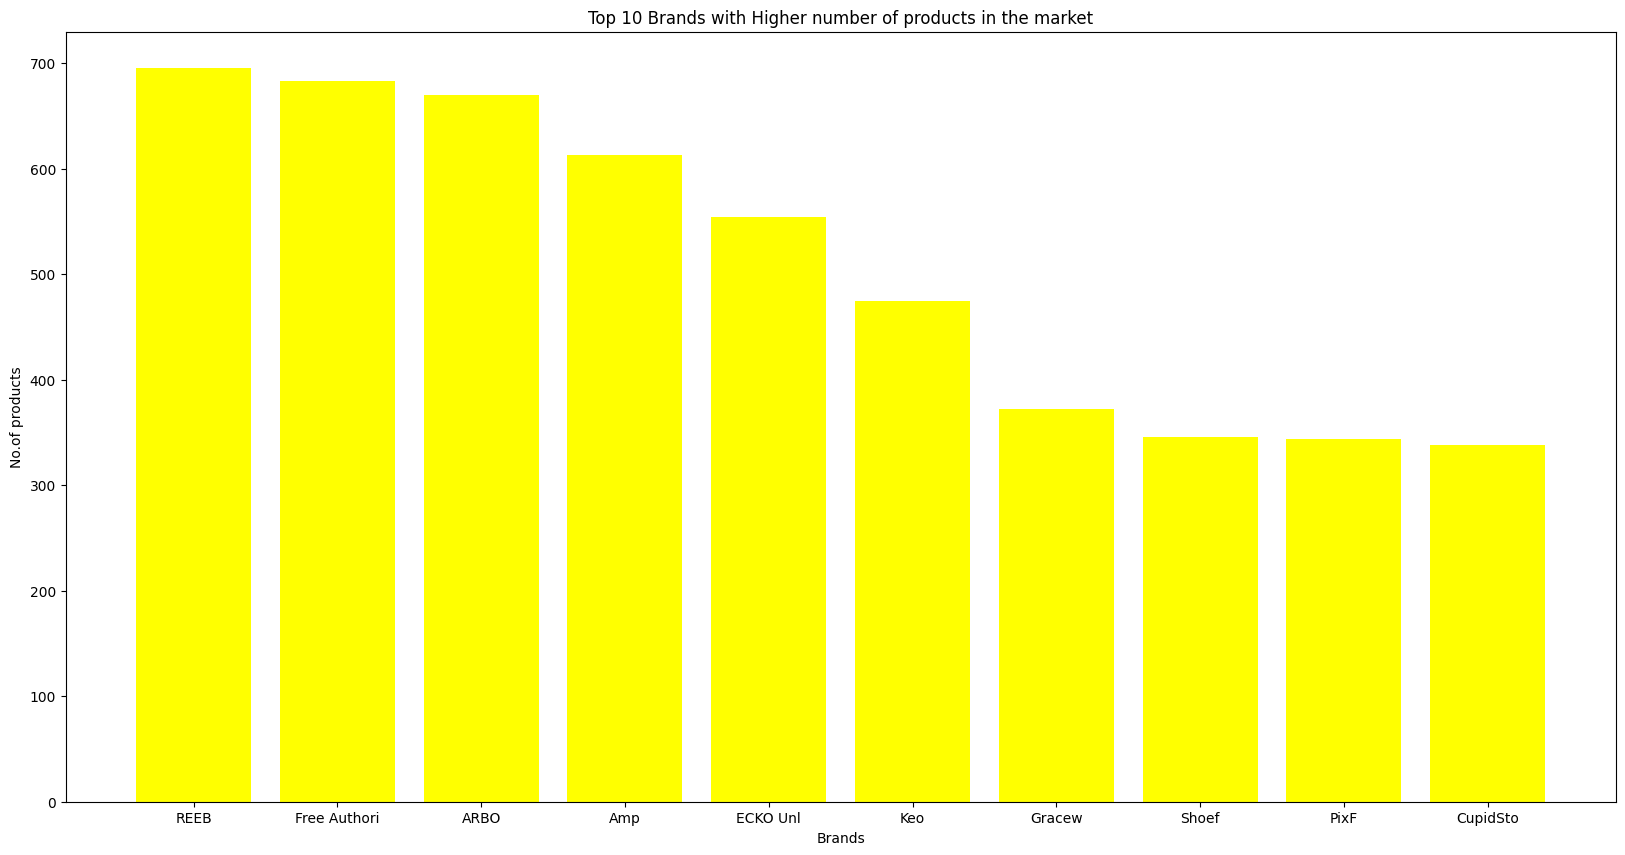

In [202]:
brand_count = new_df['brand'].value_counts()[:10]
plt.figure(figsize=(20, 10))
plt.bar(brand_count.index,brand_count.values,color = 'yellow')
plt.title('Top 10 Brands with Higher number of products in the market')
plt.xlabel('Brands')
plt.ylabel('No.of products')

In [203]:
brands_avg_rating = new_df.groupby('brand')['average_rating'].mean()
sort_brands = brands_avg_rating.sort_values(ascending = False)
top_brand = sort_brands.head(10)
top_brand

brand
VARTe         5.000000
MILD          5.000000
Bindass Bo    4.700000
SORA          4.561290
COL           4.550000
GYMBROTHE     4.533333
Modest Ci     4.500000
Cots          4.486010
PixF          4.461337
Neon Ro       4.400000
Name: average_rating, dtype: float64

Text(0.5, 1.0, 'Top Brands by Average Rating')

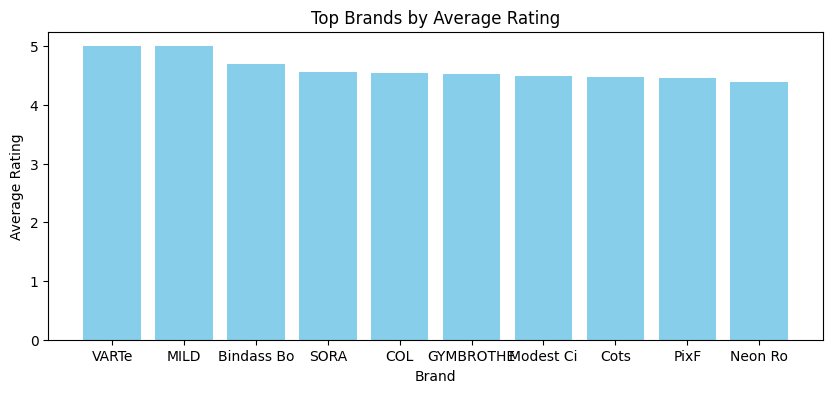

In [204]:
plt.figure(figsize=(10, 4))
plt.bar(top_brand.index, top_brand.values, color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Top Brands by Average Rating')

In [205]:
brands_avg_rating = new_df.groupby('brand')['average_rating'].mean()
sort_brands = brands_avg_rating.sort_values(ascending = True)
low_brand = sort_brands.head(10)
low_brand

brand
ShreeR                 1.900000
Lafabriquei            2.050000
saltla                 2.200000
Sketch Vib             2.300000
Divi Divi              2.400000
Elegant Appar          2.500000
shiwam ethn            2.500000
ZIP                    2.515385
Pramukhraj Enterpri    2.600000
HaltonHil              2.617949
Name: average_rating, dtype: float64

Text(0.5, 1.0, 'Low Brands by Average Rating')

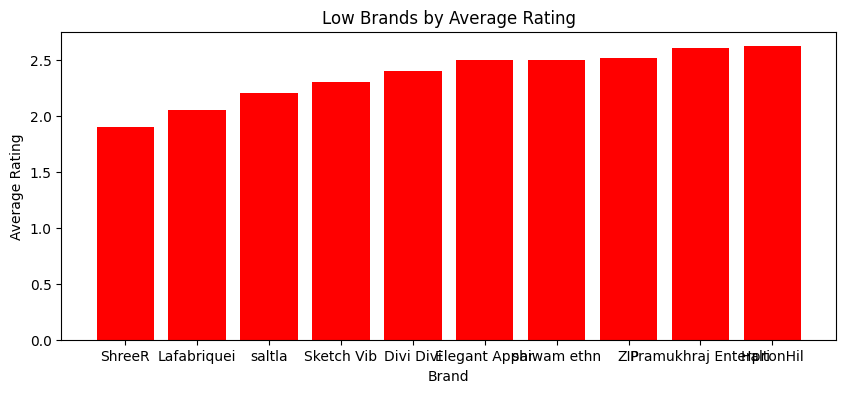

In [206]:
plt.figure(figsize=(10, 4))
plt.bar(low_brand.index, low_brand.values, color='red')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Low Brands by Average Rating')

In [207]:
#category analysis 
new_df['category'].value_counts()

category
Clothing and Accessories    13734
Footwear                      275
Name: count, dtype: int64

In [208]:
#subcategory analysis
new_df['sub_category'].value_counts()

sub_category
Topwear                                 8986
Bottomwear                              1769
Winter Wear                             1171
Clothing Accessories                     799
Innerwear and Swimwear                   516
Kurtas, Ethnic Sets and Bottoms          325
Men's Footwear                           275
Sleepwear                                 43
Uber Urban Clothing and Accessories       26
Fabrics                                   22
Tracksuits                                20
Raincoats                                 19
Inspire Clothing and Accessories          16
Crocks Club Clothing and Accessories      10
Blazers, Waistcoats and Suits              8
INSPIRE Clothing and Accessories           4
Name: count, dtype: int64

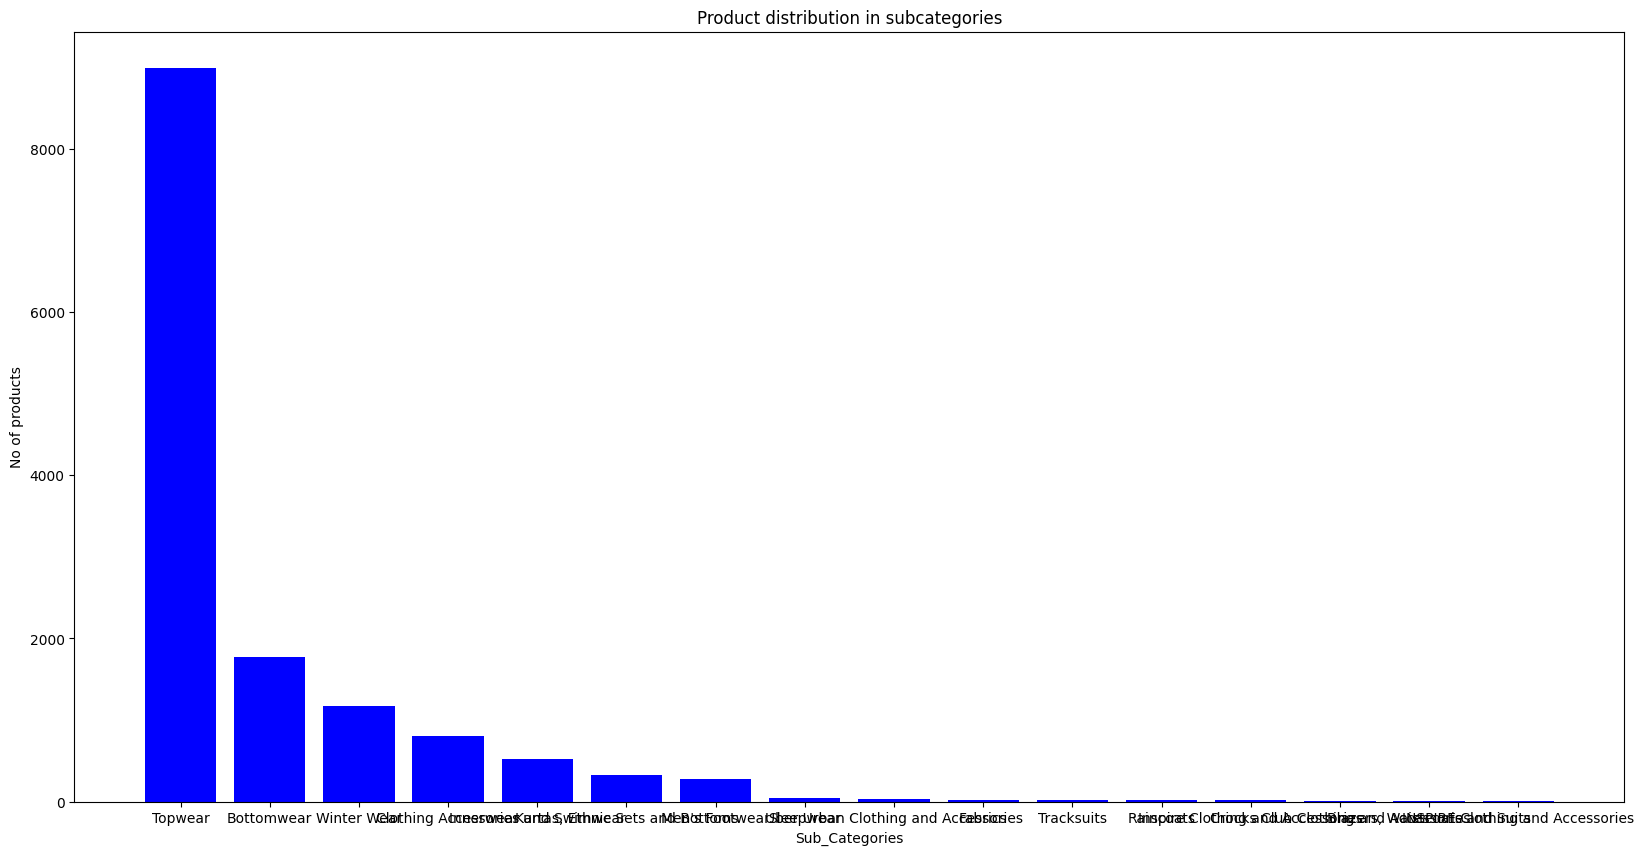

In [211]:
subcategory_count = new_df['sub_category'].value_counts()
plt.figure(figsize=(20, 10))
plt.bar(subcategory_count.index,subcategory_count.values,color ='blue')
#y_ticks = range(0, max(subcategory_count.values) + 1, 1000)
#plt.yticks(y_ticks)
plt.title('Product distribution in subcategories')
plt.xlabel('Sub_Categories')
plt.ylabel('No of products')
plt.show()


### Price Analysis

In [212]:
#analysing actual price and selling price and then discounts on products
#understanding the correlation between actual price and selling price
actual_selling_correlation = new_df[['actual_price','selling_price']].corr()
actual_selling_correlation

,actual_price,selling_price
actual_price,1.000000,0.820099
selling_price,0.820099,1.000000


<Axes: ylabel='actual_price'>

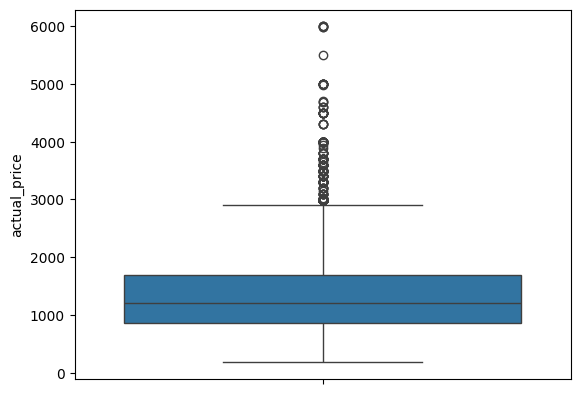

In [213]:
sns.boxplot(new_df['actual_price'])

<Axes: ylabel='selling_price'>

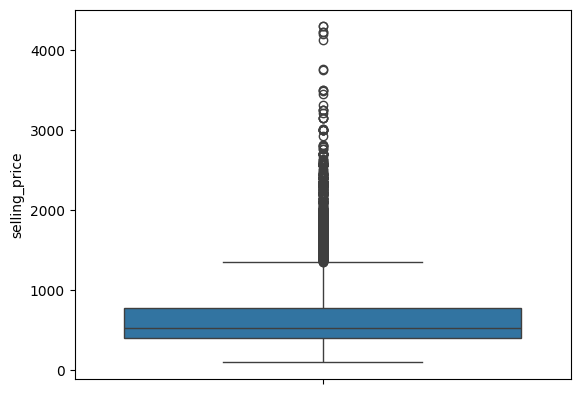

In [214]:
sns.boxplot(new_df['selling_price'])

In [215]:
# Brand that gives the maximum price difference
new_df['price_difference'] = new_df['actual_price'] - new_df['selling_price']
max = new_df['price_difference'].max()

#Filter the DataFrame where the price difference is higher than a certain value (e.g., 1000)
df_filtered = new_df[new_df['price_difference'] >= max]
grouped_brands = df_filtered.groupby('brand').size().reset_index(name='count')
sorted_group = grouped_brands.sort_values(by='count',ascending=False)
max_low_priced_brands = sorted_group.head(10)
max_low_priced_brands

C:\Users\devik\AppData\Local\Temp\ipykernel_8396\1588910869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price_difference'] = new_df['actual_price'] - new_df['selling_price']


,brand,count
0,Purple Sta,1


In [217]:
#finding the maximum price difference
new_df['price_difference'] = new_df['actual_price'] - new_df['selling_price']
max = new_df['price_difference'].max()
max

C:\Users\devik\AppData\Local\Temp\ipykernel_8396\1410615082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price_difference'] = new_df['actual_price'] - new_df['selling_price']


1922.0

In [218]:
#finding the maximum discount over products
new_df['discount'].max()

87.0